In [2]:
from GPA import GPA
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
from glob import glob
from scipy.interpolate import lagrange 

In [54]:
fmfiles = glob("Fundamental/*.csv")
fmfiles = np.sort(fmfiles)
fmfiles

array(['Fundamental/a.sorvedouro.csv', 'Fundamental/b.fonte.csv',
       'Fundamental/c.asymm.diag-.csv', 'Fundamental/d.asymm.diag+.csv',
       'Fundamental/e.asymm.diag++.csv', 'Fundamental/f.assym.vert-.csv',
       'Fundamental/g.assym.vert+.csv', 'Fundamental/h.assym.vert++.csv',
       'Fundamental/i.laminar.csv',
       'Fundamental/j.laminar.contaminado.csv',
       'Fundamental/k.random.permutation.csv',
       'Fundamental/l.random.permutation.2.csv'], dtype='<U38')

In [3]:
matrices = [pd.read_csv(f,header=None,  index_col=False).values.astype(float) for f in fmfiles]

In [4]:
ga = GPA(0.0)
gms = [ga(m,moment=["G1_Classic","G1","G2","G3","G4"]) for m in matrices]
gms = pd.DataFrame(gms)
gms

,G1_Classic,G1,G2,G3,G4
0,0.000000,0.000000,0.000000,0.000000,0.000000+0.000000j
1,0.000000,0.000000,0.000000,0.000000,0.000000+0.000000j
2,0.400000,0.323185,0.812282,0.510557,1.022744+0.605740j
3,0.800000,0.386390,0.812282,0.610557,0.687840-0.007168j
4,0.000000,0.779137,0.336396,0.466667,0.753675-0.872938j
5,0.000000,0.000000,0.336735,0.380952,0.239835+0.897598j
6,0.000000,0.000000,0.166667,0.166667,-0.636514+3.141593j
7,0.000000,0.000000,0.214286,0.380952,-1.098612+3.141593j
8,0.777778,0.195262,0.500000,0.758784,1.879772+1.689487j
9,1.000000,0.280252,0.769850,0.710686,1.341395+0.641272j


In [5]:
ga(matrices[5],moment=["G1_Classic","G1","G2","G3","G4"])
np.array(ga.asymmetricalP)

array([[0, 0, 0],
       [1, 1, 1],
       [0, 0, 0]], dtype=int32)

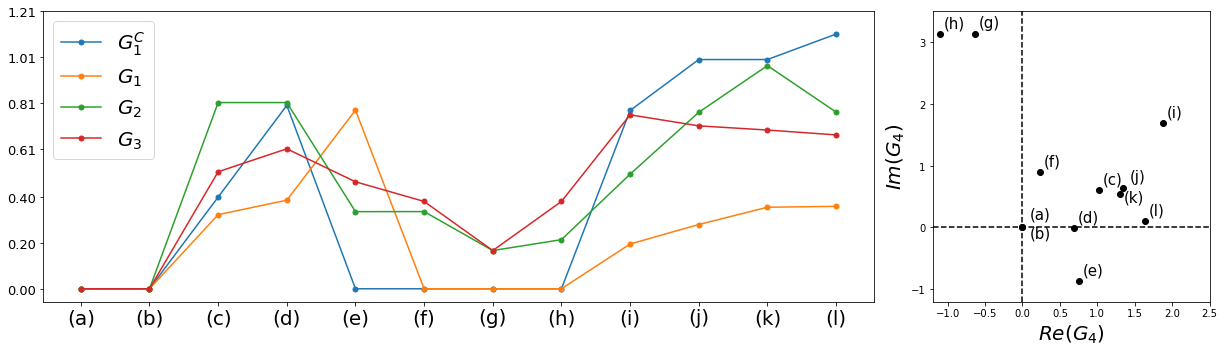

In [6]:
gs = GridSpec(1,2,width_ratios=[3,1])
labels = ["(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)","(i)","(j)","(k)","(l)"]

plt.figure(figsize =(17,5))
plt.subplot(gs[0,0])
plt.plot(gms["G1_Classic"],marker='.',markersize=10,label=r'$G_1^C$')
plt.plot(gms["G1"],marker='.',markersize=10,label=r'$G_1$')
plt.plot(gms["G2"],marker='.',markersize=10,label=r'$G_2$')
plt.plot(gms["G3"],marker='.',markersize=10,label=r'$G_3$')
plt.legend(fontsize=20)
mats = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)']
plt.yticks(np.round(np.linspace(0.0,np.max(gms["G1_Classic"])+0.1,7),2),fontsize=13)
plt.xticks(np.arange(12),mats,fontsize=20)
#plt.plot(gms["G4"],marker='.',markersize=10)
plt.subplot(gs[0,1])
plt.scatter(np.real(gms["G4"]),np.imag(gms["G4"]),color='k')
plt.ylabel(r"$Im(G_4)$",fontsize = 20)
plt.xlabel(r"$Re(G_4)$",fontsize = 20)

plt.axvline(0,color='k',ls='--')
plt.axhline(0,color='k',ls='--')
plt.text(np.real(gms["G4"][0])+0.1,np.imag(gms["G4"][0])+0.14,s=labels[0],fontsize=15)
plt.text(np.real(gms["G4"][1])+0.1,np.imag(gms["G4"][1])-0.17,s=labels[1],fontsize=15)
plt.text(np.real(gms["G4"][2])+0.05,np.imag(gms["G4"][2])+0.1,s=labels[2],fontsize=15)
plt.text(np.real(gms["G4"][3])+0.05,np.imag(gms["G4"][3])+0.1,s=labels[3],fontsize=15)
plt.text(np.real(gms["G4"][4])+0.05,np.imag(gms["G4"][4])+0.1,s=labels[4],fontsize=15)
plt.text(np.real(gms["G4"][5])+0.05,np.imag(gms["G4"][5])+0.1,s=labels[5],fontsize=15)
plt.text(np.real(gms["G4"][6])+0.05,np.imag(gms["G4"][6])+0.1,s=labels[6],fontsize=15)
plt.text(np.real(gms["G4"][7])+0.05,np.imag(gms["G4"][7])+0.1,s=labels[7],fontsize=15)
plt.text(np.real(gms["G4"][8])+0.05,np.imag(gms["G4"][8])+0.1,s=labels[8],fontsize=15)
plt.text(np.real(gms["G4"][9])+0.09,np.imag(gms["G4"][9])+0.1,s=labels[9],fontsize=15)
plt.text(np.real(gms["G4"][10])+0.05,np.imag(gms["G4"][10])-0.12,s=labels[10],fontsize=15)
plt.text(np.real(gms["G4"][11])+0.05,np.imag(gms["G4"][11])+0.1,s=labels[11],fontsize=15)


plt.xlim(-1.2,2.5)
plt.ylim(-1.2,3.5)
    
plt.tight_layout()
plt.savefig("GPAFundamental.png",dpi=300)
plt.show()

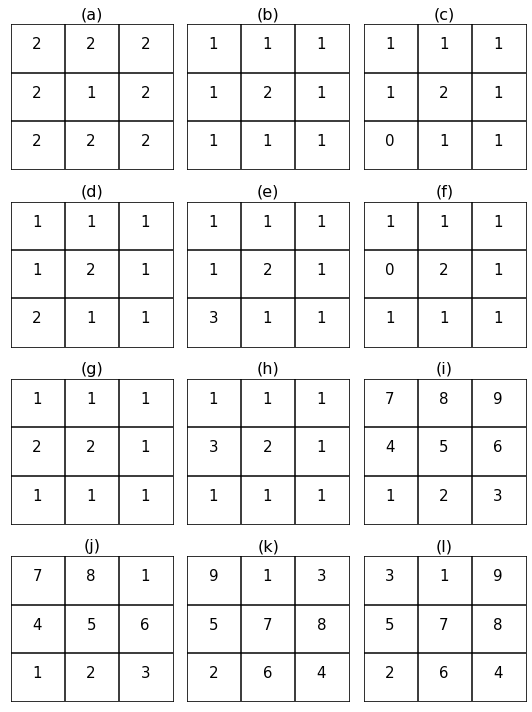

In [19]:
matricesI = [pd.read_csv(f,header=None,  index_col=False).values.astype(int) for f in fmfiles]
plt.figure(figsize=(7.5,10))
for i in range(len(matrices)):
    plt.subplot(4,3,i+1)
    #plt.imshow(matricesI[i],cmap='autumn',alpha=0.6,origin='upper')
    plt.axhline(1.5,color='k')
    plt.axvline(1.5,color='k')
    plt.axvline(0.5,color='k')
    plt.axhline(0.5,color='k')

    for j in range(3):
        for k in range(3):
            plt.text(j-0.1,k,str(matricesI[i][k][j]),color='k',fontsize=15)
            #plt.text(j-0.1,k+0.1,str(matricesI[i][k][j]),color='k',fontsize=15)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(-0.5,2.5)
    plt.ylim(-0.5,2.5)
    plt.title(labels[i],fontsize=16)
    
plt.tight_layout()
plt.savefig('MatricesFundamental.png',dpi=300)
plt.show()


In [49]:
def lagrGrad(mat):
    dx = []
    dy = []
    for i in range(len(mat)):
        base = np.arange(3)
        dx.append(np.polyval(lagrange(base,mat[i]).deriv(),base))
    for i in range(len(mat[0])):
        base = np.arange(3)
        dy.append(np.polyval(lagrange(base,mat[:,i]).deriv(),base))
    return np.array(dx),np.array(dy).T
    

[[ 0.  0.  0.]
 [-2.  0.  2.]
 [ 0.  0.  0.]]
[[ 0. -2.  0.]
 [ 0.  0.  0.]
 [ 0.  2.  0.]]


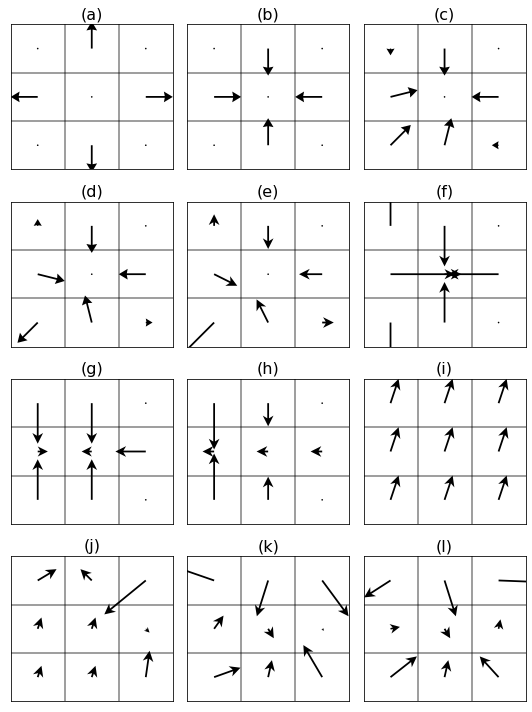

In [50]:
matricesI = [pd.read_csv(f,header=None,  index_col=False).values.astype(int) for f in fmfiles]
plt.figure(figsize=(7.5,10))
for i in range(len(matrices)):
    plt.subplot(4,3,i+1)
    plt.axhline(1.5,color='k',alpha=0.5)
    plt.axvline(1.5,color='k',alpha=0.5)
    plt.axvline(0.5,color='k',alpha=0.5)
    plt.axhline(0.5,color='k',alpha=0.5)
    dx,dy = lagrGrad(matricesI[i])
    if(i==0):
        print(dx)
        print(dy)
    
    #plt.imshow(matricesI[i],cmap='autumn',alpha=0.6,origin='upper')
    if i<4:
        plt.quiver(dx,dy,width=0.011,headwidth=6,headlength=5,scale=12)
    elif (i>4) & (i<7):
        plt.quiver(dx,dy,width=0.011,headwidth=6,headlength=6,scale=8)
    elif i ==8:
        plt.quiver(dx,dy,width=0.011,headwidth=6,headlength=6,scale=20)
    elif i>8:
        plt.quiver(dx,dy,width=0.011,headwidth=6,headlength=6,scale=43)
    else:
        plt.quiver(dx,dy,width=0.011,headwidth=6,headlength=6,scale=14)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(-0.5,2.5)
    plt.ylim(-0.5,2.5)
    plt.title(labels[i],fontsize=16)
    
plt.tight_layout()
plt.savefig('GradientsFundamental.png',dpi=300)
plt.show()


# Fivers

In [9]:
fmfiles = glob("Fivers/*.csv")
fmfiles = np.sort(fmfiles)
fmfiles

array(['Fivers/m0.csv', 'Fivers/m1.csv', 'Fivers/m2.csv', 'Fivers/m3.csv',
       'Fivers/m4.csv', 'Fivers/m5.csv', 'Fivers/m6.csv'], dtype='<U13')

In [5]:
matrices = [pd.read_csv(f,header=None,  index_col=False).values.astype(float) for f in fmfiles]

In [6]:
ga = GPA(0.0)
gms = [ga(m,moment=["G1_Classic","G1","G2","G3","G4"]) for m in matrices]
gms = pd.DataFrame(gms)
gms

,G1_Classic,G1,G2,G3,G4
0,0.000000,0.000000,0.000000,0.000000,0.000000+0.000000j
1,0.600000,0.244652,0.228553,0.254289,1.229883+0.000000j
2,0.666667,0.404750,0.250873,0.147134,0.829917+0.255402j
3,0.600000,0.596990,0.190957,0.129605,1.066183-0.000000j
4,0.000000,0.000000,0.058406,0.081949,1.043660+2.117506j
5,0.000000,0.607768,0.143305,0.126393,0.393504+0.991885j
6,0.000000,0.000000,0.064645,0.076393,0.438825+1.917370j


In [5]:
ga(matrices[6],moment=["G1_Classic","G1","G2","G3","G4"])

{'G1_Classic': 0.0,
 'G1': 0.0,
 'G2': 0.06464466094067263,
 'G3': 0.07639320225002104,
 'G4': (0.4388245731174758+1.9173699170748693j)}

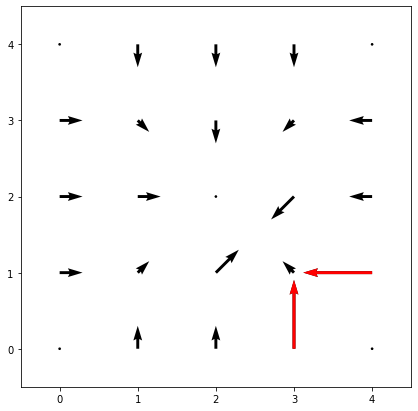

In [6]:
dx,dy = np.array(ga.gradient_dx),np.array(ga.gradient_dy)
#dx,dy = np.gradient(matrices[4])
asymm = ga.getAsymmetricalMask()


plt.figure(figsize=(7,7))

plt.quiver(dx,dy)
dx[asymm==0], dy[asymm==0] = np.nan, np.nan
plt.quiver(dx,dy,color='red',scale=17)

plt.xlim(-0.5,4.5)
plt.ylim(-0.5,4.5)
plt.show()

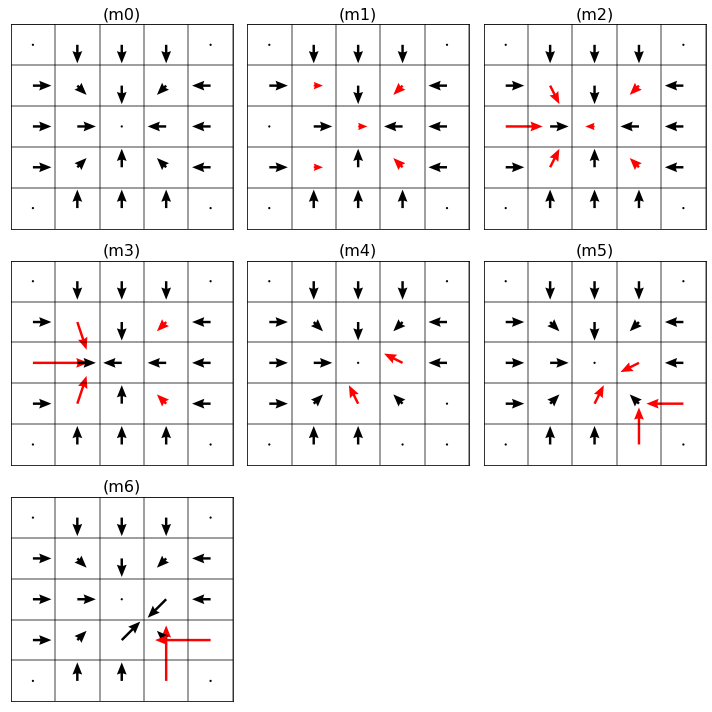

In [66]:
matricesI = [pd.read_csv(f,header=None,  index_col=False).values.astype(int) for f in fmfiles]
plt.figure(figsize=(10,10))
for i in range(len(matrices)):
    plt.subplot(3,3,i+1)
    for j in range(5):
        plt.axhline(0.5+j,color='k',alpha=0.5)
        plt.axvline(0.5+j,color='k',alpha=0.5)
    dx,dy = np.gradient(matricesI[i])
    ga(matricesI[i].astype(float))
    mask = np.ravel(ga.getAsymmetricalMask())
    colors = [[0.0,0.0,0.0] if mask[j]==0 else [1.0,0.0,0.0] for j in range(len(mask))]    
    plt.quiver(dy,dx,color=colors,width=0.011,headwidth=4,headlength=5,scale=12)
    
    plt.xticks([])
    plt.yticks([])
    plt.xlim(-0.5,4.5)
    plt.ylim(-0.5,4.5)
    plt.title(labels[i],fontsize=16)
    
plt.tight_layout()
plt.savefig('GradientsFivers.png',dpi=300)
plt.show()


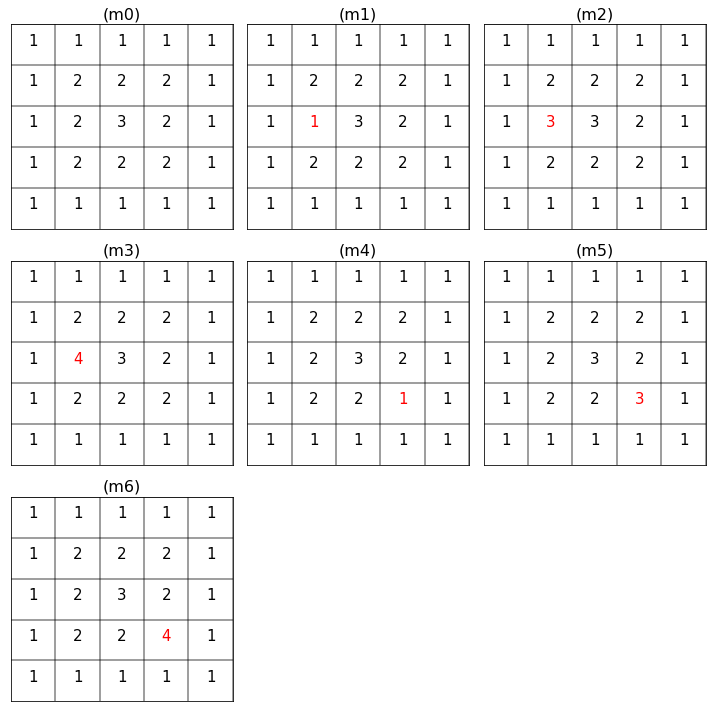

In [68]:
matricesI = [pd.read_csv(f,header=None,  index_col=False).values.astype(int) for f in fmfiles]
plt.figure(figsize=(10,10))
for i in range(len(matrices)):
    plt.subplot(3,3,i+1)
    for j in range(5):
        plt.axhline(0.5+j,color='k',alpha=0.5)
        plt.axvline(0.5+j,color='k',alpha=0.5)

    for j in range(5):
        for k in range(5):
            if (i==1)&(j==1)&(k==2):
                plt.text(j-0.1,k,str(matricesI[i][k][j]),color='r',fontsize=15)
            elif (i==2)&(j==1)&(k==2):
                plt.text(j-0.1,k,str(matricesI[i][k][j]),color='r',fontsize=15)
            elif (i==3)&(j==1)&(k==2):
                plt.text(j-0.1,k,str(matricesI[i][k][j]),color='r',fontsize=15)
            elif (i>3)&(j==3)&(k==1):
                plt.text(j-0.1,k,str(matricesI[i][k][j]),color='r',fontsize=15)
            else:
                plt.text(j-0.1,k,str(matricesI[i][k][j]),color='k',fontsize=15)
    
            
            #plt.text(j-0.1,k+0.1,str(matricesI[i][k][j]),color='k',fontsize=15)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(-0.5,4.5)
    plt.ylim(-0.5,4.5)
    plt.title(labels[i],fontsize=16)
    
plt.tight_layout()
plt.savefig('MatricesFivers.png',dpi=300)
plt.show()


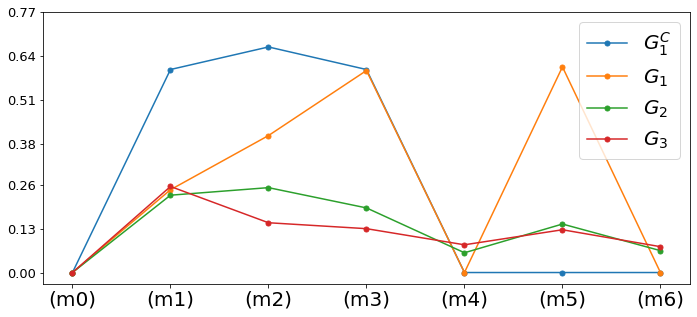

In [7]:
gs = GridSpec(1,2,width_ratios=[3,1])

plt.figure(figsize =(17,5))
plt.subplot(gs[0,0])
plt.plot(gms["G1_Classic"],marker='.',markersize=10,label=r'$G_1^C$')
plt.plot(gms["G1"],marker='.',markersize=10,label=r'$G_1$')
plt.plot(gms["G2"],marker='.',markersize=10,label=r'$G_2$')
plt.plot(gms["G3"],marker='.',markersize=10,label=r'$G_3$')
plt.legend(fontsize=20)
mats = ['(m0)','(m1)','(m2)','(m3)','(m4)','(m5)','(m6)']
plt.yticks(np.round(np.linspace(0.0,np.max(gms["G1_Classic"])+0.1,7),2),fontsize=13)
plt.xticks(np.arange(7),mats,fontsize=20)
plt.show()

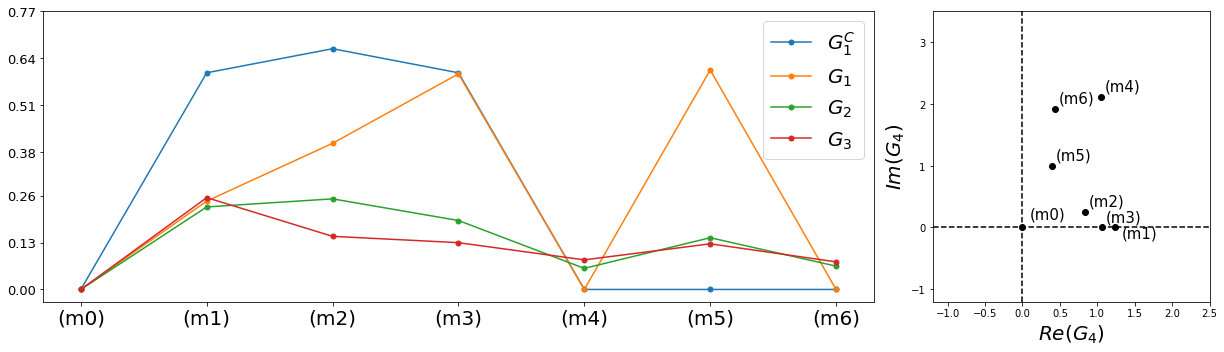

In [69]:
gs = GridSpec(1,2,width_ratios=[3,1])
labels =['(m0)','(m1)','(m2)','(m3)','(m4)','(m5)','(m6)']

plt.figure(figsize =(17,5))
plt.subplot(gs[0,0])
plt.plot(gms["G1_Classic"],marker='.',markersize=10,label=r'$G_1^C$')
plt.plot(gms["G1"],marker='.',markersize=10,label=r'$G_1$')
plt.plot(gms["G2"],marker='.',markersize=10,label=r'$G_2$')
plt.plot(gms["G3"],marker='.',markersize=10,label=r'$G_3$')
plt.legend(fontsize=20)
plt.yticks(np.round(np.linspace(0.0,np.max(gms["G1_Classic"])+0.1,7),2),fontsize=13)
plt.xticks(np.arange(len(labels)),labels,fontsize=20)
#plt.plot(gms["G4"],marker='.',markersize=10)
plt.subplot(gs[0,1])
plt.scatter(np.real(gms["G4"]),np.imag(gms["G4"]),color='k')
plt.ylabel(r"$Im(G_4)$",fontsize = 20)
plt.xlabel(r"$Re(G_4)$",fontsize = 20)

plt.axvline(0,color='k',ls='--')
plt.axhline(0,color='k',ls='--')
plt.text(np.real(gms["G4"][0])+0.1,np.imag(gms["G4"][0])+0.14,s=labels[0],fontsize=15)
plt.text(np.real(gms["G4"][1])+0.1,np.imag(gms["G4"][1])-0.17,s=labels[1],fontsize=15)
plt.text(np.real(gms["G4"][2])+0.05,np.imag(gms["G4"][2])+0.1,s=labels[2],fontsize=15)
plt.text(np.real(gms["G4"][3])+0.05,np.imag(gms["G4"][3])+0.1,s=labels[3],fontsize=15)
plt.text(np.real(gms["G4"][4])+0.05,np.imag(gms["G4"][4])+0.1,s=labels[4],fontsize=15)
plt.text(np.real(gms["G4"][5])+0.05,np.imag(gms["G4"][5])+0.1,s=labels[5],fontsize=15)
plt.text(np.real(gms["G4"][6])+0.05,np.imag(gms["G4"][6])+0.1,s=labels[6],fontsize=15)


plt.xlim(-1.2,2.5)
plt.ylim(-1.2,3.5)
    
plt.tight_layout()
plt.savefig("GPAFivers.png",dpi=300)
plt.show()

In [ ]:
matricesI = [pd.read_csv(f,header=None,  index_col=False).values.astype(int) for f in fmfiles]
plt.figure(figsize=(7.5,10))
for i in range(len(matrices)):
    plt.subplot(4,3,i+1)
    plt.axhline(1.5,color='k',alpha=0.5)
    plt.axvline(1.5,color='k',alpha=0.5)
    plt.axvline(0.5,color='k',alpha=0.5)
    plt.axhline(0.5,color='k',alpha=0.5)
    dx,dy = lagrGrad(matricesI[i])
    if(i==0):
        print(dx)
        print(dy)
    
    #plt.imshow(matricesI[i],cmap='autumn',alpha=0.6,origin='upper')
    if i<4:
        plt.quiver(dx,dy,width=0.011,headwidth=6,headlength=5,scale=12)
    elif (i>4) & (i<7):
        plt.quiver(dx,dy,width=0.011,headwidth=6,headlength=6,scale=8)
    elif i ==8:
        plt.quiver(dx,dy,width=0.011,headwidth=6,headlength=6,scale=20)
    elif i>8:
        plt.quiver(dx,dy,width=0.011,headwidth=6,headlength=6,scale=43)
    else:
        plt.quiver(dx,dy,width=0.011,headwidth=6,headlength=6,scale=14)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(-0.5,2.5)
    plt.ylim(-0.5,2.5)
    plt.title(labels[i],fontsize=16)
    
plt.tight_layout()
plt.savefig('GradientsFundamental.png',dpi=300)
plt.show()


# Trash code:

In [8]:
ga.getAsymmetricalMask()

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int32)

In [9]:
ga(np.arange(20).reshape(4,5).astype(float))

{'G2': 0.5}

In [11]:
ga.getAsymmetricalMask()

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int32)

In [12]:
ga.getSymmetricalMask()

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int32)

In [13]:
ga.getUnknownMask()

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int32)